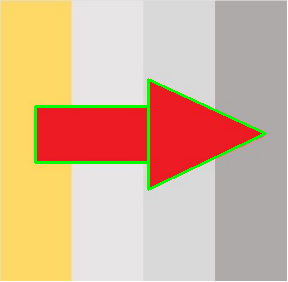

Percentage Areas of Color Bars:
Yellow: 9.78%
Light Gray: 19.27%
Gray: 26.13%
Dark Gray: 6.08%


In [97]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_percentage_area_of_color_bars(image_path, y_threshold=150):
    # Load the image
    image = cv2.imread(image_path)

    # Define the ROIs (rectangular regions) for each color bar
    rois = [
        (3, 0, 72, 275),  # Coordinates for the first color bar
        (73, 0, 142, 275),  # Coordinates for the second color bar
        (143, 0, 212, 275),  # Coordinates for the third color bar
        (213, 0, 282, 275)  # Coordinates for the fourth color bar
    ]

    # Define separate ROIs for the rectangular and triangular parts of the arrow
    rectangular_arrow_roi = [(35, 106), (148, 106), (148, 162), (35, 162)]
    triangular_arrow_roi = [(148, 79), (148, 189), (265, 133)]

    # Initialize a list to store percentage areas
    percentage_areas = []

    # Draw the highlighted arrow (rectangular part) on the image
    cv2.polylines(image, [np.array(rectangular_arrow_roi)], isClosed=True, color=(0, 255, 0), thickness=2)

    # Draw the highlighted arrow (triangular part) on the image
    cv2.polylines(image, [np.array(triangular_arrow_roi)], isClosed=True, color=(0, 255, 0), thickness=2)

    # Display the original image with the highlighted arrow in Colab
    cv2_imshow(image)

    # Loop through each ROI to calculate areas
    for i, (x1, y1, x2, y2) in enumerate(rois):
        # Extract the region of interest (color bar)
        roi = image[y1:y2, x1:x2]

        # Calculate the area of the color bar
        color_bar_area = (x2 - x1) * (y2 - y1)

        # Convert the color bar to the LAB color space
        lab_color_bar = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)

        # Split the LAB channels
        l_channel, _, _ = cv2.split(lab_color_bar)

        # Calculate the Y channel (brightness) using the L channel
        y_channel = l_channel

        # Create a mask for pixels with Y values below the threshold
        below_threshold_mask = (y_channel < y_threshold).astype(np.uint8)

        # Calculate the area by counting the number of pixels below the threshold
        pixel_count = np.sum(below_threshold_mask)

        # Calculate the percentage area of the color bar
        percentage_area = (pixel_count / color_bar_area) * 100

        # Append the percentage area to the list
        percentage_areas.append(percentage_area)

    return percentage_areas

# Test the function with your image and threshold
image_path = '/content/drive/MyDrive/pics/bararrow.PNG'  # Provide the path to your image
y_threshold = 150  # Adjust the threshold as needed
percentage_areas = calculate_percentage_area_of_color_bars(image_path, y_threshold)

# Define color names for the bars
color_names = ["Yellow", "Light Gray", "Gray", "Dark Gray"]

# Print the percentage areas for all color bars
print("Percentage Areas of Color Bars:")
for i, percentage_area in enumerate(percentage_areas):
    print(f"{color_names[i]}: {percentage_area:.2f}%")
